# 1. Load libraries and data

### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2. Load data

In [3]:
data_import = pd.read_csv('W9 - ProjectData_2.csv')
data_import.head()

,station_id,station_code,station_name,latitude,longitude,month,day_of_week,holiday,malfunction_cause,malfunction_cause_group,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility
0,8400244,GDM,Geldermalsen,51.883010,5.271270,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
1,8400319,HT,'s-Hertogenbosch,51.690480,5.293620,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
2,8400732,ZBM,Zaltbommel,51.808887,5.263333,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
3,8400226,ALMO,Almere Oostvaarders,52.403332,5.300556,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5
4,8400394,LLS,Lelystad Centrum,52.507778,5.472778,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5


# 2. EDA

### 2.1. Data exploration

In [4]:
print("DATA SHAPE IS: ", data_import.shape)
print("")
print ("DATA DTYPES ARE: ") 
data_import.dtypes

DATA SHAPE IS:  (26665, 17)

DATA DTYPES ARE: 


station_id                   int64
station_code                object
station_name                object
latitude                   float64
longitude                  float64
month                        int64
day_of_week                 object
holiday                       bool
malfunction_cause           object
malfunction_cause_group     object
duration_minutes           float64
avg_temp                   float64
rain_mm                      int64
highest_mean_wind_speed      int64
avg_relative_humidity        int64
radiation                    int64
avg_visibility             float64
dtype: object

#### 2.6.5. I will bin the rain column

In [5]:
data_import['rain_bins'] = pd.qcut(data_import['rain_mm'],labels=["low", "medium", "high"], q=3,precision=0)

In [6]:
data_import.head()

,station_id,station_code,station_name,latitude,longitude,month,day_of_week,holiday,malfunction_cause,malfunction_cause_group,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility,rain_bins
0,8400244,GDM,Geldermalsen,51.883010,5.271270,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5,medium
1,8400319,HT,'s-Hertogenbosch,51.690480,5.293620,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5,medium
2,8400732,ZBM,Zaltbommel,51.808887,5.263333,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5,medium
3,8400226,ALMO,Almere Oostvaarders,52.403332,5.300556,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5,medium
4,8400394,LLS,Lelystad Centrum,52.507778,5.472778,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5,medium


In [7]:
data_import.dtypes

station_id                    int64
station_code                 object
station_name                 object
latitude                    float64
longitude                   float64
month                         int64
day_of_week                  object
holiday                        bool
malfunction_cause            object
malfunction_cause_group      object
duration_minutes            float64
avg_temp                    float64
rain_mm                       int64
highest_mean_wind_speed       int64
avg_relative_humidity         int64
radiation                     int64
avg_visibility              float64
rain_bins                  category
dtype: object

#### 2.1.1. Changing dtypes

In [8]:
data_import['duration_minutes'] = data_import['duration_minutes'].astype('int64')
data_import[['month', 'holiday','rain_bins', 'highest_mean_wind_speed']] = data_import[['month', 'holiday','rain_bins', 'highest_mean_wind_speed']].astype('object')

### 2.2. Checking for null values 
* there shouldn't be any, since this dataset was saved after cleaning.\

### 2.3. Checking unique values

In [9]:
for c in data_import[['holiday', 'duration_minutes', 'avg_temp', 'rain_mm',
       'highest_mean_wind_speed', 'avg_relative_humidity', 'radiation',
       'avg_visibility']]:
    print(c.upper())
    print(data_import[c].value_counts())
    print('-------------------------------------------------------------------------')

HOLIDAY
False    26217
True       448
Name: holiday, dtype: int64
-------------------------------------------------------------------------
DURATION_MINUTES
0        2078
5         465
6         443
3         410
4         406
13        398
2         364
1         343
10        342
12        340
14        324
8         293
9         286
11        283
16        278
7         269
25        261
35        257
36        233
19        230
17        221
27        218
33        209
38        206
15        202
28        198
30        196
18        196
24        195
45        194
32        193
26        188
20        187
59        184
42        179
23        178
40        178
44        175
34        172
37        172
54        171
31        161
29        159
46        156
43        156
86        151
72        151
21        150
41        146
22        145
49        143
70        142
51        140
39        140
66        137
55        134
52        132
53        132
56        131
76        129
50 

* This is interesting data to have, I will save this output as a dataframe for future 

* station_id, station_code and station_name contain the same information in different formats. Latitude and longitude in theory also offer the same information. For predictions, We will want to keep information about which station is affected by malfunctions: we already see that we can drop 4 columns.
* malfunction_cause is giving more detailed information than malfunction_cause_group. I will try 2 models, one with each option. I'm interested to see how I would get better predictions

### 2.4. Dropping columns

In [10]:
data_import.columns

Index(['station_id', 'station_code', 'station_name', 'latitude', 'longitude',
       'month', 'day_of_week', 'holiday', 'malfunction_cause',
       'malfunction_cause_group', 'duration_minutes', 'avg_temp', 'rain_mm',
       'highest_mean_wind_speed', 'avg_relative_humidity', 'radiation',
       'avg_visibility', 'rain_bins'],
      dtype='object')

In [11]:
data = data_import.drop(['station_id','station_name','latitude','longitude','malfunction_cause', 'rain_mm'], axis = 1)

## Delete duration <= 0

In [12]:
data = data[data["duration_minutes"]>0]
len(data)

24587

### 2.5. Divide data into numerical and categorical

In [13]:
data.dtypes

station_code                object
month                       object
day_of_week                 object
holiday                     object
malfunction_cause_group     object
duration_minutes             int64
avg_temp                   float64
highest_mean_wind_speed     object
avg_relative_humidity        int64
radiation                    int64
avg_visibility             float64
rain_bins                   object
dtype: object

In [14]:
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(include=['int64', 'float64'])

In [15]:
cat_df.head()

,station_code,month,day_of_week,holiday,malfunction_cause_group,highest_mean_wind_speed,rain_bins
0,GDM,1,Tuesday,True,infrastructure,50,medium
1,HT,1,Tuesday,True,infrastructure,50,medium
2,ZBM,1,Tuesday,True,infrastructure,50,medium
3,ALMO,1,Tuesday,True,external,50,medium
4,LLS,1,Tuesday,True,external,50,medium


In [16]:
num_df.head()

,duration_minutes,avg_temp,avg_relative_humidity,radiation,avg_visibility
0,1,74.5,77,177,55.5
1,1,74.5,77,177,55.5
2,1,74.5,77,177,55.5
3,162,74.5,77,177,55.5
4,162,74.5,77,177,55.5


### 2.6. Numerical Columns

#### 2.6.1. Getting basic statistical summary of the numerical columns

In [17]:
num_df.describe()

,duration_minutes,avg_temp,avg_relative_humidity,radiation,avg_visibility
count,24587.000000,24587.000000,24587.000000,24587.000000,24587.000000
mean,122.417253,109.959735,78.743808,1051.378086,58.660552
std,351.118904,65.514967,10.606476,830.951288,13.157885
min,1.000000,-20.000000,42.000000,31.000000,20.000000
25%,20.000000,62.000000,73.000000,330.000000,46.000000
50%,56.000000,101.000000,80.000000,867.000000,62.500000
75%,135.000000,156.000000,87.000000,1727.000000,70.500000
max,17011.000000,297.500000,97.000000,3036.000000,79.000000


In [18]:
num_df.skew(axis = 0, skipna = True) 

duration_minutes         27.915216
avg_temp                  0.472711
avg_relative_humidity    -0.758912
radiation                 0.649036
avg_visibility           -0.417108
dtype: float64

#### 2.6.2. Checking correlations

In [19]:
num_df.corr(method = 'pearson')

,duration_minutes,avg_temp,avg_relative_humidity,radiation,avg_visibility
duration_minutes,1.000000,0.110747,-0.059466,0.072474,0.014196
avg_temp,0.110747,1.000000,-0.590717,0.705791,0.288932
avg_relative_humidity,-0.059466,-0.590717,1.000000,-0.809975,-0.559320
radiation,0.072474,0.705791,-0.809975,1.000000,0.320114
avg_visibility,0.014196,0.288932,-0.559320,0.320114,1.000000


#### 2.6.3. Checking distributions

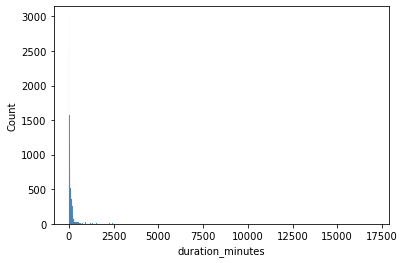

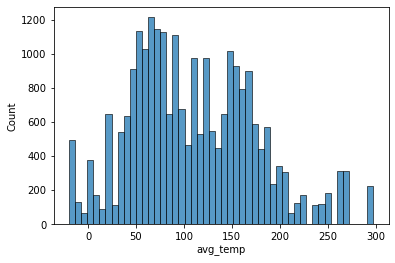

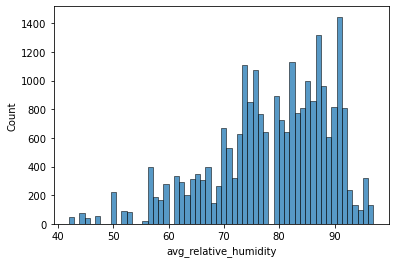

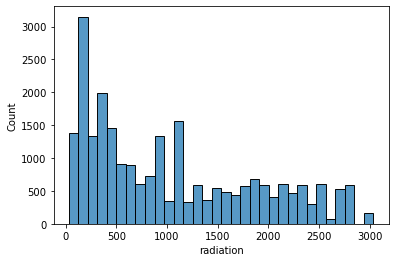

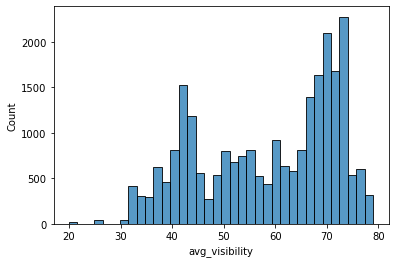

In [20]:
for i in num_df.columns:
    sns.histplot(num_df[i])
    plt.show()

#### 2.6.4. Checking outliers

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


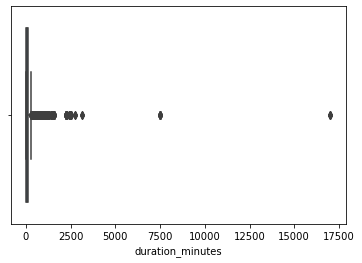

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


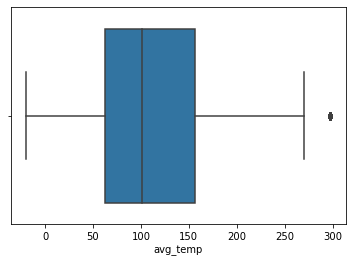

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


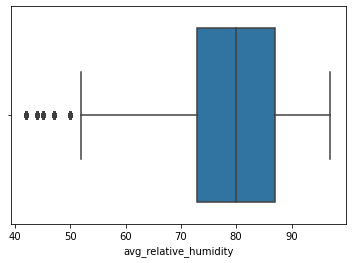

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


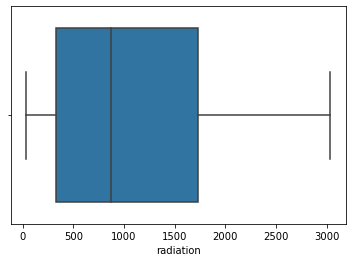

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


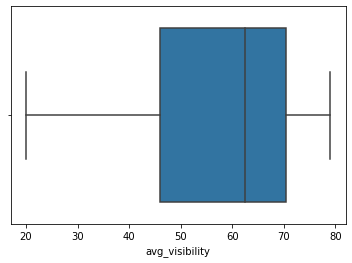

In [21]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [22]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

In [23]:
((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()

duration_minutes         1784
avg_temp                  224
avg_relative_humidity     437
radiation                   0
avg_visibility              0
dtype: int64

In [24]:
outlier_df = num_df.drop(['radiation', 'avg_visibility'], axis=1)

In [25]:
for col in outlier_df.columns:
    iqr = np.percentile(outlier_df[col],75) - np.percentile(outlier_df[col],25)
    upper_limit = np.percentile(outlier_df[col],75) + 1.5*iqr
    lower_limit = np.percentile(outlier_df[col],75) - 1.5*iqr
    print("For column {}:".format(col))
    print("the upper wisker is at: %4.2f" % upper_limit)
    print("the lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = outlier_df[outlier_df[col] > upper_limit].index.tolist()
    outliers_lower = outlier_df[outlier_df[col] < lower_limit].index.tolist()
    print("the number of points outise the upper wisker is: ",len(outliers_upper))
    print("the number of points outise the lower wisker is: ",len(outliers_lower))

For column duration_minutes:
the upper wisker is at: 307.50
the lower wisker is at: -37.50
the number of points outise the upper wisker is:  1784
the number of points outise the lower wisker is:  0
For column avg_temp:
the upper wisker is at: 297.00
the lower wisker is at: 15.00
the number of points outise the upper wisker is:  224
the number of points outise the lower wisker is:  1249
For column avg_relative_humidity:
the upper wisker is at: 108.00
the lower wisker is at: 66.00
the number of points outise the upper wisker is:  0
the number of points outise the lower wisker is:  3157


* Although dropping outliers is risky business (e.g. house prices - the model would not be able to predict outlier prices), in this specific case, it makes sense to drop the outliers from duration_minutes.
* For this specific problem we are trying to predict the time it will take for a malfunction to be resolved. That means that the user will have been castaway presently. The value of a duration above 24h (exaggerating) makes no sense, since this will have probably been reported already 
* When the value of duration_minutes is 295.50 (5h) we can assume that such a prediction will already allow a user to make the decision to search for an alternative means of transport.

In [26]:
filtered_data = data[(data["duration_minutes"]<295.50) & (data["duration_minutes"]>5)]
len(filtered_data)

20674

In [29]:
filtered_data.head()

,station_code,month,day_of_week,holiday,malfunction_cause_group,duration_minutes,avg_temp,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility,rain_bins
3,ALMO,1,Tuesday,True,external,162,74.5,50,77,177,55.5,medium
4,LLS,1,Tuesday,True,external,162,74.5,50,77,177,55.5,medium
5,EML,1,Tuesday,True,infrastructure,17,74.5,50,77,177,55.5,medium
6,HD,1,Tuesday,True,infrastructure,17,74.5,50,77,177,55.5,medium
7,PT,1,Tuesday,True,infrastructure,17,74.5,50,77,177,55.5,medium


In [31]:
cat_filt = filtered_data.select_dtypes(include=['object'])
num_filt = filtered_data.select_dtypes(include=['int64', 'float64'])

In [ ]:
len(cat_filt)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [34]:
calc_vif(num_filt.drop(['avg_visibility', 'avg_temp'], axis=1))

,variables,VIF
0,duration_minutes,2.372903
1,avg_relative_humidity,3.065462
2,radiation,2.063250


In [35]:
num_filt_drop = num_filt.drop(['avg_visibility', 'avg_temp'], axis=1)

# LOG

In [36]:
def log_transform(x):
    if np.isfinite(x) and x!=0: 
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [37]:
duration = pd.DataFrame(num_filt_drop['duration_minutes'])

In [38]:
duration.head()
duration.isna().sum()

duration_minutes    0
dtype: int64

In [62]:
log = num_filt.applymap(log_transform)
log.head()
log.isna().sum()
log_drop = log.dropna()

<ipython-input-36-a553a51f2430>:3: RuntimeWarning: invalid value encountered in log
  return np.log(x)


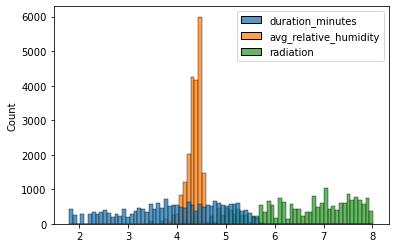

In [54]:
sns.histplot(log)
plt.show()

In [63]:
calc_vif(log_drop)

,variables,VIF
0,duration_minutes,16.447396
1,avg_temp,59.972729
2,avg_relative_humidity,159.906510
3,radiation,59.790013
4,avg_visibility,235.758765


## BOX COX Rest of numericals

In [42]:
num = num_filt_drop.drop(['duration_minutes'],axis = 1)

In [43]:
num.shape

(20674, 2)

In [ ]:
#scaler = MinMaxScaler(feature_range=(1, 2))
#power = PowerTransformer(method='box-cox')
#pipeline = Pipeline(steps=[('s', scaler),('p', power)])
#num_pipe = pipeline.fit_transform(num)

In [44]:
#scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer()
num_pipe = power.fit_transform(num)

In [45]:
dataset = pd.DataFrame(num_pipe, columns = num.columns)

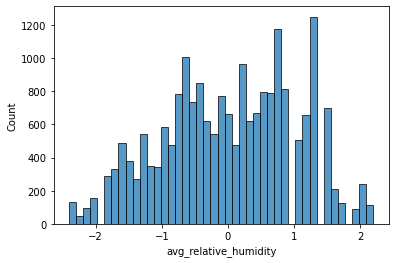

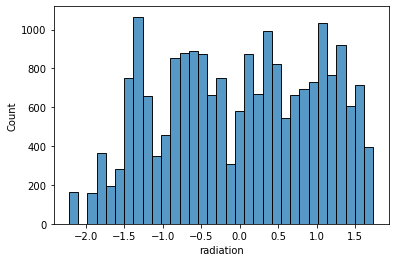

In [46]:
for i in dataset.columns:
    sns.histplot(dataset[i])
    plt.show()

In [47]:
num_data = pd.concat([dataset,log], axis = 1)

In [49]:
num_data.isnull().sum()

avg_relative_humidity    4848
radiation                4848
duration_minutes         4848
dtype: int64

In [51]:
dropped = num_data.dropna()

In [ ]:
#def log_transform(x):
#    if np.isfinite(x) and x!=0: 
#        return np.log(x)
#    else:
#        return np.NAN # We are returning NaNs so that we can replace them later

In [ ]:
#num_log = num_df.applymap(log_transform)
#num_log.head()

### 2.7. Categorical Columns

#### 2.7.1. Get Dummies

In [61]:
dummy_data = pd.get_dummies(cat_filt,drop_first=True)
dummy_data.head()

,station_code_AH,station_code_AHP,station_code_AHPR,station_code_AHZ,station_code_AKL,station_code_AKM,station_code_ALM,station_code_ALMB,station_code_ALMM,station_code_ALMO,station_code_ALMP,station_code_AMF,station_code_AMFS,station_code_AML,station_code_AMPO,station_code_AMR,station_code_AMRI,station_code_AMRN,station_code_ANA,station_code_ANDD,station_code_APD,station_code_APDM,station_code_APDO,station_code_APG,station_code_APN,station_code_ARN,station_code_ASA,station_code_ASB,station_code_ASD,station_code_ASDL,station_code_ASDM,station_code_ASDZ,station_code_ASHD,station_code_ASN,station_code_ASS,station_code_ASSP,station_code_ATN,station_code_ATW,station_code_ATWLB,station_code_AVAT,station_code_BD,station_code_BDE,station_code_BDG,station_code_BDM,station_code_BDPB,station_code_BERCH,station_code_BET,station_code_BF,station_code_BGN,station_code_BH,station_code_BHDV,station_code_BHV,station_code_BIELEF,station_code_BK,station_code_BKF,station_code_BKG,station_code_BKL,station_code_BL,station_code_BLL,station_code_BMN,station_code_BMR,station_code_BN,station_code_BNC,station_code_BNK,station_code_BNN,station_code_BNZ,station_code_BP,station_code_BR,station_code_BRD,station_code_BRESSX,station_code_BRN,station_code_BRUSC,station_code_BRUSN,station_code_BRUSZ,station_code_BSD,station_code_BSK,station_code_BSKS,station_code_BSMZ,station_code_BTL,station_code_BUENDE,station_code_BV,station_code_BZL,station_code_CAS,station_code_CK,station_code_CL,station_code_CO,station_code_CPS,station_code_CVM,station_code_DA,station_code_DB,station_code_DDN,station_code_DDR,station_code_DDRS,station_code_DDZD,station_code_DEI,station_code_DID,station_code_DL,station_code_DLD,station_code_DLN,station_code_DMN,station_code_DMNZ,station_code_DN,station_code_DR,station_code_DRH,station_code_DRON,station_code_DRP,station_code_DT,station_code_DTC,station_code_DTCH,station_code_DTCP,station_code_DUISB,station_code_DUSSEL,station_code_DV,station_code_DVC,station_code_DVD,station_code_DVN,station_code_DVNK,station_code_DWE,station_code_DZ,station_code_DZW,station_code_EC,station_code_ED,station_code_EDC,station_code_EDN,station_code_EEM,station_code_EGH,station_code_EGHM,station_code_EHS,station_code_EHV,station_code_EKZ,station_code_EM,station_code_EML,station_code_EMN,station_code_EMNZ,station_code_ES,station_code_ESE,station_code_ESK,station_code_ESN,station_code_EST,station_code_ETN,station_code_FBNL,station_code_FKTH,station_code_FN,station_code_FVS,station_code_FWD,station_code_G,station_code_GBG,station_code_GBR,station_code_GD,station_code_GDG,station_code_GDM,station_code_GDR,station_code_GERP,station_code_GK,station_code_GKT,station_code_GLN,station_code_GN,station_code_GND,station_code_GNN,station_code_GO,station_code_GP,station_code_GR,station_code_GS,station_code_GV,station_code_GVC,station_code_GVM,station_code_GVMW,station_code_GW,station_code_GWD,station_code_GZ,station_code_HAD,station_code_HB,station_code_HBZM,station_code_HD,station_code_HDB,station_code_HDE,station_code_HDG,station_code_HDR,station_code_HDRZ,station_code_HFD,station_code_HGL,station_code_HGLG,station_code_HGLO,station_code_HGV,station_code_HGZ,station_code_HIL,station_code_HK,station_code_HKS,station_code_HLG,station_code_HLGH,station_code_HLM,station_code_HLMS,station_code_HLO,station_code_HM,station_code_HMBH,station_code_HMBV,station_code_HMH,station_code_HMN,station_code_HN,station_code_HNK,station_code_HNO,station_code_HNP,station_code_HON,station_code_HOR,station_code_HR,station_code_HRL,station_code_HRLW,station_code_HRN,station_code_HRT,station_code_HRY,station_code_HT,station_code_HTN,station_code_HTNC,station_code_HTO,station_code_HVL,station_code_HVS,station_code_HVSM,station_code_HVSP,station_code_HWD,station_code_HWZB,station_code_HZ,station_code_HZE,station_code_IJT,station_code_KBD,station_code_KBK,station_code_KBOI,station_code_KBRY,station_code_KDFFH,station_code_KDUL,station_code_KKD,station_code_KLP,station_code_KMA,station_code_KMR,station

In [ ]:
#power_cat = PowerTransformer()
#dummy_bc = power_cat.fit_transform(dummy_data)

In [ ]:
#dataset_dummy = pd.DataFrame(dummy_bc, columns = dummy_data.columns)

In [ ]:
dataset_dummy.head()

### 2.8. Concatenating numerical and categorical data

In [ ]:
data_concat = pd.concat([num_data,dataset_dummy], axis=1)
data_concat.head()

In [ ]:
data_concat.isnull().sum()

In [ ]:
data_concat = data_concat.dropna()

In [ ]:
data_concat.isnull().sum()

In [ ]:
data_concat.shape

In [65]:
data_concat = pd.concat([log,dummy_data], axis=1)
data_concat.head()

,duration_minutes,avg_temp,avg_relative_humidity,radiation,avg_visibility,station_code_AH,station_code_AHP,station_code_AHPR,station_code_AHZ,station_code_AKL,station_code_AKM,station_code_ALM,station_code_ALMB,station_code_ALMM,station_code_ALMO,station_code_ALMP,station_code_AMF,station_code_AMFS,station_code_AML,station_code_AMPO,station_code_AMR,station_code_AMRI,station_code_AMRN,station_code_ANA,station_code_ANDD,station_code_APD,station_code_APDM,station_code_APDO,station_code_APG,station_code_APN,station_code_ARN,station_code_ASA,station_code_ASB,station_code_ASD,station_code_ASDL,station_code_ASDM,station_code_ASDZ,station_code_ASHD,station_code_ASN,station_code_ASS,station_code_ASSP,station_code_ATN,station_code_ATW,station_code_ATWLB,station_code_AVAT,station_code_BD,station_code_BDE,station_code_BDG,station_code_BDM,station_code_BDPB,station_code_BERCH,station_code_BET,station_code_BF,station_code_BGN,station_code_BH,station_code_BHDV,station_code_BHV,station_code_BIELEF,station_code_BK,station_code_BKF,station_code_BKG,station_code_BKL,station_code_BL,station_code_BLL,station_code_BMN,station_code_BMR,station_code_BN,station_code_BNC,station_code_BNK,station_code_BNN,station_code_BNZ,station_code_BP,station_code_BR,station_code_BRD,station_code_BRESSX,station_code_BRN,station_code_BRUSC,station_code_BRUSN,station_code_BRUSZ,station_code_BSD,station_code_BSK,station_code_BSKS,station_code_BSMZ,station_code_BTL,station_code_BUENDE,station_code_BV,station_code_BZL,station_code_CAS,station_code_CK,station_code_CL,station_code_CO,station_code_CPS,station_code_CVM,station_code_DA,station_code_DB,station_code_DDN,station_code_DDR,station_code_DDRS,station_code_DDZD,station_code_DEI,station_code_DID,station_code_DL,station_code_DLD,station_code_DLN,station_code_DMN,station_code_DMNZ,station_code_DN,station_code_DR,station_code_DRH,station_code_DRON,station_code_DRP,station_code_DT,station_code_DTC,station_code_DTCH,station_code_DTCP,station_code_DUISB,station_code_DUSSEL,station_code_DV,station_code_DVC,station_code_DVD,station_code_DVN,station_code_DVNK,station_code_DWE,station_code_DZ,station_code_DZW,station_code_EC,station_code_ED,station_code_EDC,station_code_EDN,station_code_EEM,station_code_EGH,station_code_EGHM,station_code_EHS,station_code_EHV,station_code_EKZ,station_code_EM,station_code_EML,station_code_EMN,station_code_EMNZ,station_code_ES,station_code_ESE,station_code_ESK,station_code_ESN,station_code_EST,station_code_ETN,station_code_FBNL,station_code_FKTH,station_code_FN,station_code_FVS,station_code_FWD,station_code_G,station_code_GBG,station_code_GBR,station_code_GD,station_code_GDG,station_code_GDM,station_code_GDR,station_code_GERP,station_code_GK,station_code_GKT,station_code_GLN,station_code_GN,station_code_GND,station_code_GNN,station_code_GO,station_code_GP,station_code_GR,station_code_GS,station_code_GV,station_code_GVC,station_code_GVM,station_code_GVMW,station_code_GW,station_code_GWD,station_code_GZ,station_code_HAD,station_code_HB,station_code_HBZM,station_code_HD,station_code_HDB,station_code_HDE,station_code_HDG,station_code_HDR,station_code_HDRZ,station_code_HFD,station_code_HGL,station_code_HGLG,station_code_HGLO,station_code_HGV,station_code_HGZ,station_code_HIL,station_code_HK,station_code_HKS,station_code_HLG,station_code_HLGH,station_code_HLM,station_code_HLMS,station_code_HLO,station_code_HM,station_code_HMBH,station_code_HMBV,station_code_HMH,station_code_HMN,station_code_HN,station_code_HNK,station_code_HNO,station_code_HNP,station_code_HON,station_code_HOR,station_code_HR,station_code_HRL,station_code_HRLW,station_code_HRN,station_code_HRT,station_code_HRY,station_code_HT,station_code_HTN,station_code_HTNC,station_code_HTO,station_code_HVL,station_code_HVS,station_code_HVSM,station_code_HVSP,station_code_HWD,station_code_HWZB,station_code_HZ,station_code_HZE,station_code_IJT,station_code_KBD,station_code_KBK,station_code_KBOI,station_code_KBRY,station_code_KDFFH,station_code_KDUL,st

In [72]:
data_concat = data_concat.dropna()

### 2.9. Divide data into dependent and independent variables

In [73]:
y = data_concat[['duration_minutes']]
X = data_concat.drop(['duration_minutes'], axis=1)

In [74]:
y.shape

(20053, 1)

In [75]:
X.shape

(20053, 481)

# 3. Model

### 3.1. Importing libraries

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### 3.2. Train-Test split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 3.3. Scaling training data

In [78]:
#X_train_exp= np.exp(X_train)
#X_test_exp= np.exp(X_test)
#y_train_exp= np.exp(y_train) 
#y_test_exp = np.exp(y_test)

In [79]:
#transformer = StandardScaler().fit(X_train)
#x_standarized = transformer.transform(X_train)
#x_standarized = pd.DataFrame(x_standarized)

### Model 1

In [106]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train.drop(['avg_visibility', 'avg_temp'], axis=1), y_train)

In [108]:
lm_predictions = lm_model.predict(X_test.drop(['avg_visibility', 'avg_temp'], axis=1))

In [109]:
lm_predictions_exp = np.exp(lm_predictions)
y_test_exp = np.exp(y_test)

In [110]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.73
The mean squared error of the model in the test set is:   0.81
The root mean squared error of the model in the test set is:   0.90
The R2 of the model in the test set is: 0.20


In [95]:
np.exp(MAE)

2.0691541638442317

In [96]:
np.exp(RMSE)

2.4641985087611014

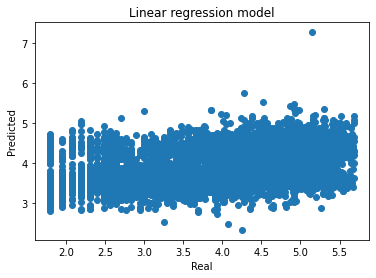

In [92]:
plt.scatter(x=y_test, y=lm_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### Model 2

In [102]:
kn = KNeighborsRegressor(n_neighbors=2)
kn_model = kn.fit(X_train, y_train)

In [103]:
kn_predictions = kn_model.predict(X_test)

In [ ]:
#kn_predictions_exp = np.exp(kn_predictions)
y_test_exp = np.exp(y_test)

In [104]:
MAE = mean_absolute_error(y_test,kn_predictions)
MSE = mean_squared_error(y_test,kn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,kn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.66
The mean squared error of the model in the test set is:   0.86
The root mean squared error of the model in the test set is:   0.93
The R2 of the model in the test set is: 0.15


In [ ]:
plt.scatter(x=y_test_exp, y=kn_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### Model 3

In [98]:
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(X_train, y_train)

In [99]:
dtr_predictions = dtr_model.predict(X_test)

In [100]:
#dtr_predictions_exp = np.exp(lm_predictions)
y_test_exp = np.exp(y_test)

In [101]:
MAE = mean_absolute_error(y_test,dtr_predictions)
MSE = mean_squared_error(y_test,dtr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,dtr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.63
The mean squared error of the model in the test set is:   0.99
The root mean squared error of the model in the test set is:   1.00
The R2 of the model in the test set is: 0.02


In [ ]:
plt.scatter(x=y_test_exp, y=dtr_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### Model 4

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from scipy.special import boxcox, inv_boxcox

In [112]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr_model = regr.fit(X_train.drop(['avg_visibility', 'avg_temp'], axis=1), y_train)

<ipython-input-112-97495d56873f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_model = regr.fit(X_train.drop(['avg_visibility', 'avg_temp'], axis=1), y_train)


In [113]:
regr_predictions = regr_model.predict(X_test.drop(['avg_visibility', 'avg_temp'], axis=1))

In [118]:
#regr_predictions_inv = inv_boxcox(regr_predictions, 2.5)
regr_predictions_exp = np.exp(regr_predictions)
y_test_exp = np.exp(y_test)

In [115]:
MAE = mean_absolute_error(y_test,regr_predictions)
MSE = mean_squared_error(y_test,regr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,regr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.73
The mean squared error of the model in the test set is:   0.81
The root mean squared error of the model in the test set is:   0.90
The R2 of the model in the test set is: 0.20


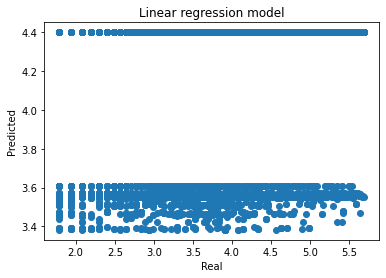

In [105]:
plt.scatter(x=y_test, y=regr_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

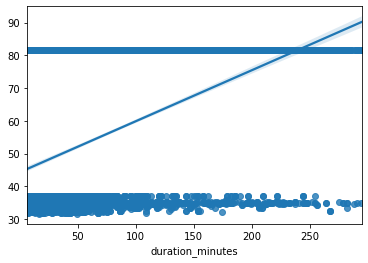

In [119]:
ax = sns.regplot(x=y_test_exp, y=regr_predictions_exp)

In [120]:
X_df = pd.DataFrame(X_test.drop(['avg_visibility', 'avg_temp'], axis=1))

In [122]:
X_df['predictions'] = regr_predictions_exp

In [125]:
X_df_fil = X_df[X_df['predictions']>=80]

In [127]:
X_df_fil.head()

,avg_relative_humidity,radiation,station_code_AH,station_code_AHP,station_code_AHPR,station_code_AHZ,station_code_AKL,station_code_AKM,station_code_ALM,station_code_ALMB,station_code_ALMM,station_code_ALMO,station_code_ALMP,station_code_AMF,station_code_AMFS,station_code_AML,station_code_AMPO,station_code_AMR,station_code_AMRI,station_code_AMRN,station_code_ANA,station_code_ANDD,station_code_APD,station_code_APDM,station_code_APDO,station_code_APG,station_code_APN,station_code_ARN,station_code_ASA,station_code_ASB,station_code_ASD,station_code_ASDL,station_code_ASDM,station_code_ASDZ,station_code_ASHD,station_code_ASN,station_code_ASS,station_code_ASSP,station_code_ATN,station_code_ATW,station_code_ATWLB,station_code_AVAT,station_code_BD,station_code_BDE,station_code_BDG,station_code_BDM,station_code_BDPB,station_code_BERCH,station_code_BET,station_code_BF,station_code_BGN,station_code_BH,station_code_BHDV,station_code_BHV,station_code_BIELEF,station_code_BK,station_code_BKF,station_code_BKG,station_code_BKL,station_code_BL,station_code_BLL,station_code_BMN,station_code_BMR,station_code_BN,station_code_BNC,station_code_BNK,station_code_BNN,station_code_BNZ,station_code_BP,station_code_BR,station_code_BRD,station_code_BRESSX,station_code_BRN,station_code_BRUSC,station_code_BRUSN,station_code_BRUSZ,station_code_BSD,station_code_BSK,station_code_BSKS,station_code_BSMZ,station_code_BTL,station_code_BUENDE,station_code_BV,station_code_BZL,station_code_CAS,station_code_CK,station_code_CL,station_code_CO,station_code_CPS,station_code_CVM,station_code_DA,station_code_DB,station_code_DDN,station_code_DDR,station_code_DDRS,station_code_DDZD,station_code_DEI,station_code_DID,station_code_DL,station_code_DLD,station_code_DLN,station_code_DMN,station_code_DMNZ,station_code_DN,station_code_DR,station_code_DRH,station_code_DRON,station_code_DRP,station_code_DT,station_code_DTC,station_code_DTCH,station_code_DTCP,station_code_DUISB,station_code_DUSSEL,station_code_DV,station_code_DVC,station_code_DVD,station_code_DVN,station_code_DVNK,station_code_DWE,station_code_DZ,station_code_DZW,station_code_EC,station_code_ED,station_code_EDC,station_code_EDN,station_code_EEM,station_code_EGH,station_code_EGHM,station_code_EHS,station_code_EHV,station_code_EKZ,station_code_EM,station_code_EML,station_code_EMN,station_code_EMNZ,station_code_ES,station_code_ESE,station_code_ESK,station_code_ESN,station_code_EST,station_code_ETN,station_code_FBNL,station_code_FKTH,station_code_FN,station_code_FVS,station_code_FWD,station_code_G,station_code_GBG,station_code_GBR,station_code_GD,station_code_GDG,station_code_GDM,station_code_GDR,station_code_GERP,station_code_GK,station_code_GKT,station_code_GLN,station_code_GN,station_code_GND,station_code_GNN,station_code_GO,station_code_GP,station_code_GR,station_code_GS,station_code_GV,station_code_GVC,station_code_GVM,station_code_GVMW,station_code_GW,station_code_GWD,station_code_GZ,station_code_HAD,station_code_HB,station_code_HBZM,station_code_HD,station_code_HDB,station_code_HDE,station_code_HDG,station_code_HDR,station_code_HDRZ,station_code_HFD,station_code_HGL,station_code_HGLG,station_code_HGLO,station_code_HGV,station_code_HGZ,station_code_HIL,station_code_HK,station_code_HKS,station_code_HLG,station_code_HLGH,station_code_HLM,station_code_HLMS,station_code_HLO,station_code_HM,station_code_HMBH,station_code_HMBV,station_code_HMH,station_code_HMN,station_code_HN,station_code_HNK,station_code_HNO,station_code_HNP,station_code_HON,station_code_HOR,station_code_HR,station_code_HRL,station_code_HRLW,station_code_HRN,station_code_HRT,station_code_HRY,station_code_HT,station_code_HTN,station_code_HTNC,station_code_HTO,station_code_HVL,station_code_HVS,station_code_HVSM,station_code_HVSP,station_code_HWD,station_code_HWZB,station_code_HZ,station_code_HZE,station_code_IJT,station_code_KBD,station_code_KBK,station_code_KBOI,station_code_KBRY,station_code_KDFFH,station_code_KDUL,station_code_KKD,station_code_KLP,station_c

In [128]:
len(X_df_fil)

2829

In [129]:
len(X_df)

6016